In [8]:
import pandas as pd
import numpy as np
import cv2 as cv

In [9]:
# save crop
coords = pd.read_csv('/mnt/synology01/Recursion/RXRX2_PLATE1-12_COORDS.csv')
coords = coords[coords['Plate']=='Plate2']
coords.shape

(1309355, 8)

In [10]:
well_subset = coords.groupby('Well').sample(n=1)
well_subset = well_subset.sample(n=5)

In [11]:
well_subset.columns

Index(['Unnamed: 0', 'Well', 'Site', 'distance', 'CoordX', 'CoordY', 'Cell_ID',
       'Plate'],
      dtype='object')

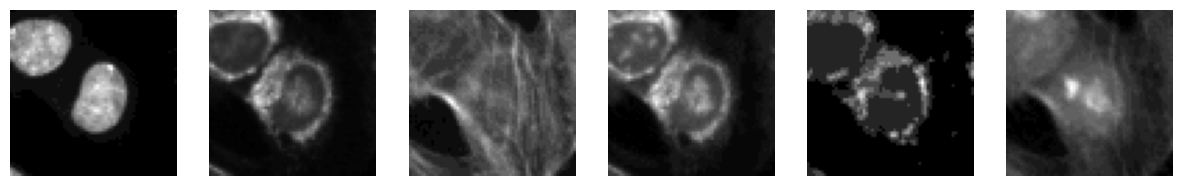

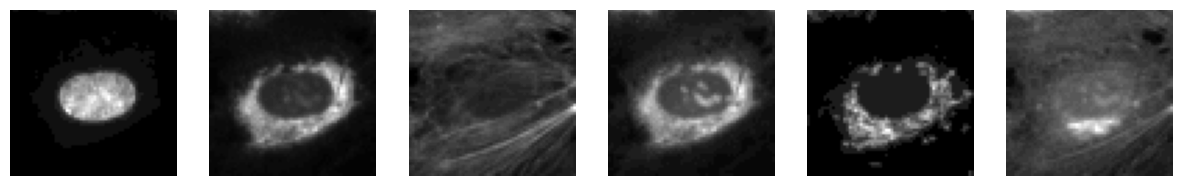

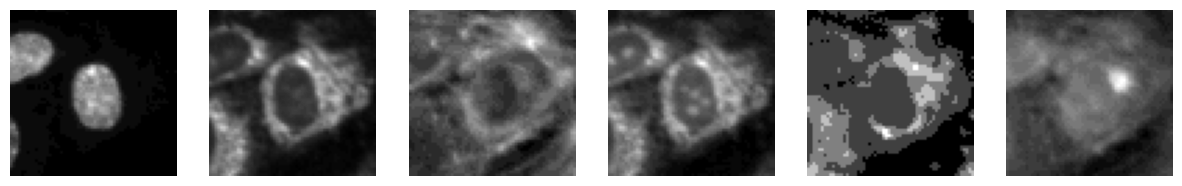

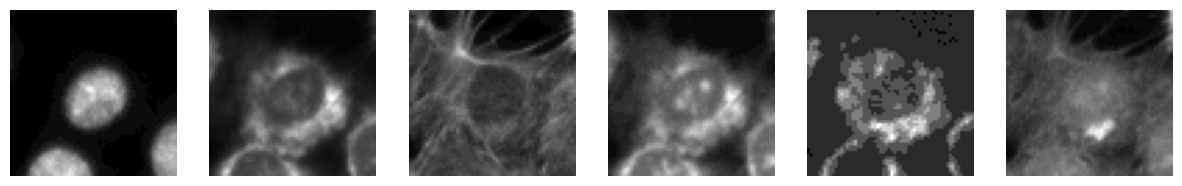

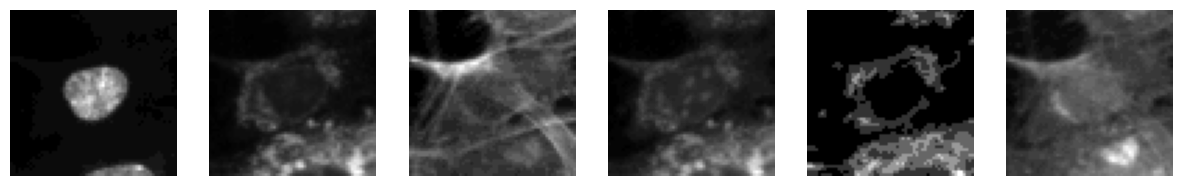

In [15]:
import os,glob
import matplotlib.pyplot as plt
img_dir = '/mnt/synology01/Recursion/rxrx2/images/HUVEC-1/Plate2/'
ROI = 30

for i, row in well_subset.iterrows():
    files = sorted(glob.glob(os.path.join(img_dir,"_".join(row[['Well','Site']])+"_w[1-6].png")))
    crop = {}
    fig,axes = plt.subplots(nrows=1,ncols=6,figsize=(15,3))
    for j,ax in enumerate(axes.flat):
        ch_img = cv.imread(files[j],cv.IMREAD_GRAYSCALE)
        centroid = row[['CoordX','CoordY']].values.astype(int)
        ch_img = ch_img[centroid[0]-ROI:centroid[0]+ROI,centroid[1]-ROI:centroid[1]+ROI]
        ax.imshow(ch_img,cmap='gray')
        if i==0:
            ax.set_title(f'w{j+1}')
        ax.axis('off')
        crop.update({f'w{j+1}':ch_img})

    # np.save(f'/home/jeffdatasci/Documents/submodules/ScaleFEx_from_crop/tests/sample_crops/rxrx2_{row["Well"]}_{row["Site"]}_sample_crop.npy',crop,allow_pickle=True)



In [18]:
print(os.getcwd())
import sys
sys.path.append('..')
from compute_measurements_functions import *
img_dir = '/home/jeffdatasci/Documents/submodules/ScaleFEx_from_crop/tests/sample_crops/'
files = [f for f in os.listdir(img_dir) if f.endswith('.npy')]
for i,file in enumerate(files):
    crop = np.load(os.path.join(img_dir,file),allow_pickle=True).item()
    masks = {}
    for i in range(1,7):
        ch = crop[f'w{i}']
        masks.update({f'w{i}':compute_primary_mask(ch)})
    
    mask_fname = "_".join(file.split('_')[:-2])+'_primary_mask.npy'
    print(mask_fname)
    mask_dir = '/home/jeffdatasci/Documents/submodules/ScaleFEx_from_crop/tests/primary_masks/'
    np.save(os.path.join(mask_dir,mask_fname),masks,allow_pickle=True)
    

/home/jeffdatasci/Documents/submodules/ScaleFEx_from_crop/tests
rxrx2_O24_s2_primary_mask.npy
rxrx2_S39_s1_primary_mask.npy
rxrx2_V20_s4_primary_mask.npy
rxrx2_W47_s2_primary_mask.npy
rxrx2_T15_s1_primary_mask.npy
